 # Airbnb EDA
Here we explore the Airbnb data I scraped. In theory there should be data scraped across a price range 10-1000+, ~51 listings (3 pages of 17 listings) for every $10 price range. This comes out to ~100*50 = 5000 listings. 

In [344]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv("airbnb_manhattan.csv")
airbnb2 = pd.read_csv("airbnb_manhattan2.csv")
airbnb = pd.concat([airbnb,airbnb2])
airbnb.drop_duplicates(subset='roomID', keep='first', inplace=True)


In [345]:
airbnb.shape

(5463, 25)

Unfortunately, this is about half the amount of data I wanted. I'll run another scrape today.

Edit: Scrape is done, now I have more data!

In [346]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [347]:
airbnb.columns.tolist()

['accuracy',
 'bathType',
 'bedType',
 'bedroomType',
 'checkin',
 'cleanliness',
 'communication',
 'guestSatisfaction',
 'isSuperhost',
 'latitude',
 'location',
 'longitude',
 'numBaths',
 'numBeds',
 'numGuests',
 'numHostReviews',
 'numReviews',
 'numRooms',
 'price',
 'rating',
 'responseTimeShown',
 'roomID',
 'roomType',
 'shortDesc',
 'value']

In [348]:
airbnb.head

<bound method NDFrame.head of       accuracy       bathType bedType bedroomType  checkin  cleanliness  \
0         10.0           bath     bed     bedroom      9.0          9.0   
1          9.0           bath    beds    bedrooms      9.0          9.0   
2         10.0           bath     bed     bedroom     10.0         10.0   
3         10.0           bath     bed     bedroom     10.0         10.0   
4         10.0           bath     bed     bedroom     10.0         10.0   
5          9.0           bath    beds     bedroom     10.0          9.0   
6         10.0           bath    beds     bedroom     10.0         10.0   
7         10.0           bath     bed     bedroom     10.0          9.0   
8         10.0          baths    beds    bedrooms     10.0         10.0   
9         10.0           bath     bed      Studio     10.0          9.0   
10        10.0           bath    beds    bedrooms     10.0         10.0   
11        10.0    shared bath     bed     bedroom     10.0         10.

In [349]:
type(airbnb)

pandas.core.frame.DataFrame

(0, 1200)

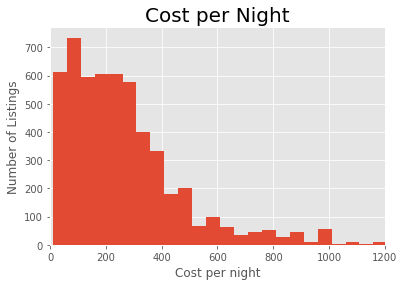

In [368]:
x =plt.hist(airbnb['price'],bins= 200)
plt.xlabel('Cost per night')
plt.ylabel('Number of Listings')
plt.title('Cost per Night', fontsize=20)
plt.xlim(0,1200)    # set the ylim to ymin, ymax

In [351]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)


In [352]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = airbnb['price'].min()
max_ = airbnb['price'].max()

data = [Histogram(x=airbnb['price'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/100))]
layout = Layout(title="Costs",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [353]:
from plotly.graph_objs import Scatter


data = [Scatter(x=airbnb['numRooms'], y=airbnb['price'], mode = 'markers')]#, text=df['movie_title'])]
layout = Layout(title="Price versus number of rooms")

fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False)

In [354]:
airbnb.isnull().sum(axis=0)

accuracy             2042
bathType                0
bedType                 0
bedroomType             0
checkin              2042
cleanliness          2042
communication        2042
guestSatisfaction    2042
isSuperhost             0
latitude                0
location             2042
longitude               0
numBaths                0
numBeds                 0
numGuests               0
numHostReviews       3363
numReviews           2042
numRooms                0
price                   0
rating               2042
responseTimeShown    5463
roomID                  0
roomType             5463
shortDesc               0
value                2042
dtype: int64

In [355]:
airbnbNew = airbnb[pd.notnull(airbnb['checkin'])]
airbnbNew.isnull().sum(axis=0)

accuracy                0
bathType                0
bedType                 0
bedroomType             0
checkin                 0
cleanliness             0
communication           0
guestSatisfaction       0
isSuperhost             0
latitude                0
location                0
longitude               0
numBaths                0
numBeds                 0
numGuests               0
numHostReviews       1911
numReviews              0
numRooms                0
price                   0
rating                  0
responseTimeShown    3421
roomID                  0
roomType             3421
shortDesc               0
value                   0
dtype: int64

In [356]:
airbnbNew.columns.to_series().groupby(airbnbNew.dtypes).groups

{dtype('bool'): Index(['isSuperhost'], dtype='object'),
 dtype('int64'): Index(['numBeds', 'numGuests', 'numRooms', 'price', 'roomID'], dtype='object'),
 dtype('float64'): Index(['accuracy', 'checkin', 'cleanliness', 'communication',
        'guestSatisfaction', 'latitude', 'location', 'longitude', 'numBaths',
        'numHostReviews', 'numReviews', 'rating', 'responseTimeShown',
        'roomType', 'value'],
       dtype='object'),
 dtype('O'): Index(['bathType', 'bedType', 'bedroomType', 'shortDesc'], dtype='object')}

Trying to generate a 3D plot, could probably do a better one...

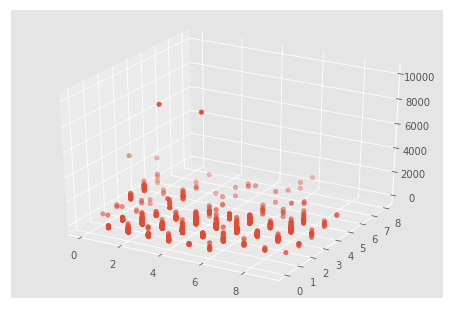

In [357]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(airbnbNew['numGuests'], airbnbNew['numRooms'], airbnbNew['price'])
plt.show()

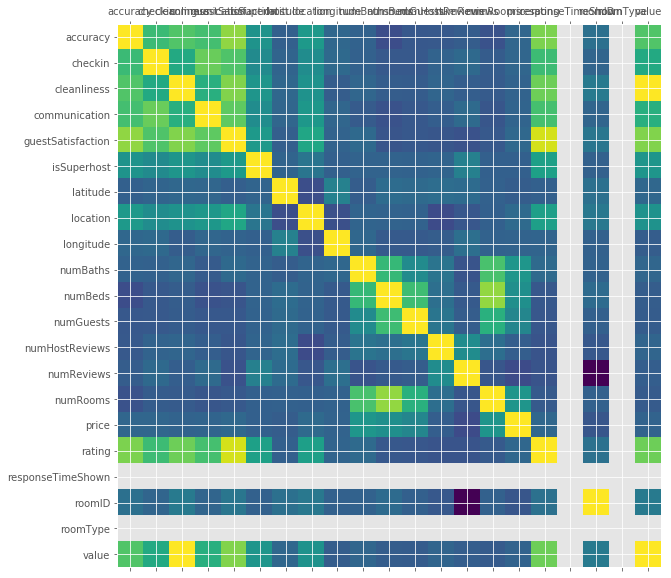

In [358]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(airbnbNew)

From the above covariance matrix we can see that the ratings are heavily correlated with each other. Not surprising. We can also see that the price is highly correlated with the size of the place (numRooms, numGuests, numBeds, numBaths). It is loosely correlated with the rest of the variables. 

I'm personally a little surprised that longitude and latitude didn't play a bigger part in the prices. I think the lack of perceived correlation is the fact that these values are not yet normalized. Next I'll normalize the data and then see how it looks on the covariance.

I'll also drop responseTimeShown and roomType and roomID. These will not play a part in the machine learning algorithm development. 

In [359]:
print(airbnbNew.iloc[:,8:18])

      isSuperhost   latitude  location  longitude  numBaths  numBeds  \
0           False  40.734189      10.0 -74.002132       1.0        1   
1           False  40.800087       9.0 -73.960403       1.0        2   
2            True  40.727490      10.0 -73.990709       1.0        1   
3            True  40.708941       9.0 -73.945544       1.0        1   
4           False  40.739466      10.0 -74.031846       1.0        1   
5           False  40.759949      10.0 -73.994369       1.0        2   
6           False  40.803686       9.0 -73.948569       1.0        2   
7           False  40.725932      10.0 -73.999343       1.0        1   
8            True  40.790612      10.0 -74.016993       2.0        3   
9           False  40.770581       9.0 -73.953584       1.0        1   
10           True  40.774820      10.0 -73.950875       1.0        3   
11          False  40.718364      10.0 -73.992459       1.0        1   
12          False  40.766384      10.0 -73.987409       1.0     

In [360]:
airbnbNew.drop(['responseTimeShown', 'roomType','roomID','bedType'], axis=1)

,accuracy,bathType,bedroomType,checkin,cleanliness,communication,guestSatisfaction,isSuperhost,latitude,location,...,numBaths,numBeds,numGuests,numHostReviews,numReviews,numRooms,price,rating,shortDesc,value
0,10.0,bath,bedroom,9.0,9.0,10.0,94.0,False,40.734189,10.0,...,1.0,1,2,NaN,141.0,1,174,4.5,Entire home/apt,9.0
1,9.0,bath,bedrooms,9.0,9.0,10.0,91.0,False,40.800087,9.0,...,1.0,2,6,NaN,73.0,2,160,4.5,Entire home/apt,9.0
2,10.0,bath,bedroom,10.0,10.0,10.0,98.0,True,40.727490,10.0,...,1.0,1,2,183.0,91.0,1,159,5.0,Entire home/apt,10.0
3,10.0,bath,bedroom,10.0,10.0,10.0,97.0,True,40.708941,9.0,...,1.0,1,4,NaN,113.0,1,150,5.0,Entire home/apt,10.0
4,10.0,bath,bedroom,10.0,10.0,10.0,97.0,False,40.739466,10.0,...,1.0,1,4,74.0,53.0,1,130,5.0,Entire home/apt,10.0
5,9.0,bath,bedroom,10.0,9.0,10.0,90.0,False,40.759949,10.0,...,1.0,2,4,46.0,46.0,1,125,4.5,Entire home/apt,9.0
6,10.0,bath,bedroom,10.0,10.0,9.0,93.0,False,40.803686,9.0,...,1.0,2,4,157.0,46.0,1,119,4.5,Entire home/apt,10.0
7,10.0,bath,bedroom,10.0,9.0,10.0,96.0,False,40.725932,10.0,...,1.0,1,2,NaN,98.0,1,100,5.0,Private room,9.0
8,10.0,baths,bedrooms,10.0,10.0,10.0,99.0,True,40.790612,10.0,...,2.0,3,6,35.0,35.0,3,94,5.0,Entire home/apt,10.0
9,10.0,bath,Studio,10.0,9.0,10.0,92.0,False,40.770581,9.0,...,1.0,1,2,NaN,28.0,0,80,4.5,Entire home/apt,9.0


In [361]:
#['bathType', 'bedType', 'bedroomType', 'shortDesc'], dtype='object')}

airbnbNew.bathType.unique() # need to take out s in two of them, convert to string
airbnbNew.bedroomType.unique() #bedroom(s), need to take out s, convert to string
airbnbNew.shortDesc.unique() #fine

airbnbNew.loc[:,'bathType'] = [word[:-1] if word[-1]=="s" else word for word in airbnbNew['bathType']]
airbnbNew.loc[:,'bedroomType'] = [word[:-1] if word[-1]=="s" else word for word in airbnbNew['bedroomType']]

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Some more data cleaning getting ready for machine learning!

In [362]:
bathDF = pd.get_dummies(airbnbNew['bathType'])
bedroomDF = pd.get_dummies(airbnbNew['bedroomType'])
shortDescDF = pd.get_dummies(airbnbNew['shortDesc'])

airbnbNew = pd.concat([airbnbNew, bathDF, bedroomDF, shortDescDF],axis=1, join_axes=[airbnbNew.index])

# Dropping all the non numeric columns...or the ones with a ton of NAs (cough...host reviews...cough)
airbnbNew.drop(['bathType','roomType','bedroomType','shortDesc','bedType','responseTimeShown','numHostReviews'], axis=1, inplace=True)
airbnbNew.set_index('roomID')

airbnbNew['isSuperhost'] = (airbnbNew['isSuperhost'] == True).astype(int)
airbnbNew = airbnbNew[airbnbNew['price'] < 700]
print(airbnbNew['price'].max)
airbnbNew

<bound method Series.max of 0       174
1       160
2       159
3       150
4       130
5       125
6       119
7       100
8        94
9        80
10       80
11       65
12       50
13       40
47       36
49       32
50       30
51       39
52       40
53       30
54       31
55       33
59       30
60       35
62       35
63       32
64       40
65       50
66       42
67       42
       ... 
3600    350
3603    351
3604    354
3606    350
3609    350
3618    350
3624    350
3628    350
3633    345
3638    345
3649    345
3652    350
3653    350
3659    349
3661    350
3663    349
3667    350
3668    349
3669    350
3670    349
3672    350
3683    350
3684    350
3685    349
3686    350
3693    350
3694    350
3698    350
3699    350
3700    350
Name: price, Length: 3330, dtype: int64>


,accuracy,checkin,cleanliness,communication,guestSatisfaction,isSuperhost,latitude,location,longitude,numBaths,...,roomID,value,bath,private bath,shared bath,Studio,bedroom,Entire home/apt,Private room,Shared room
0,10.0,9.0,9.0,10.0,94.0,0,40.734189,10.0,-74.002132,1.0,...,3689140,9.0,1,0,0,0,1,1,0,0
1,9.0,9.0,9.0,10.0,91.0,0,40.800087,9.0,-73.960403,1.0,...,12940401,9.0,1,0,0,0,1,1,0,0
2,10.0,10.0,10.0,10.0,98.0,1,40.727490,10.0,-73.990709,1.0,...,3302921,10.0,1,0,0,0,1,1,0,0
3,10.0,10.0,10.0,10.0,97.0,1,40.708941,9.0,-73.945544,1.0,...,8763502,10.0,1,0,0,0,1,1,0,0
4,10.0,10.0,10.0,10.0,97.0,0,40.739466,10.0,-74.031846,1.0,...,4915391,10.0,1,0,0,0,1,1,0,0
5,9.0,10.0,9.0,10.0,90.0,0,40.759949,10.0,-73.994369,1.0,...,15719302,9.0,1,0,0,0,1,1,0,0
6,10.0,10.0,10.0,9.0,93.0,0,40.803686,9.0,-73.948569,1.0,...,19387402,10.0,1,0,0,0,1,1,0,0
7,10.0,10.0,9.0,10.0,96.0,0,40.725932,10.0,-73.999343,1.0,...,959788,9.0,1,0,0,0,1,0,1,0
8,10.0,10.0,10.0,10.0,99.0,1,40.790612,10.0,-74.016993,2.0,...,20241681,10.0,1,0,0,0,1,1,0,0
9,10.0,10.0,9.0,10.0,92.0,0,40.770581,9.0,-73.953584,1.0,...,17093180,9.0,1,0,0,1,0,1,0,0


In [363]:
print(airbnbNew['price'].max())

699


In [364]:
#Normalizing:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(airbnbNew)
airbnb_Norm = pd.DataFrame(np_scaled)

# airbnb_Norm['roomID'] = Series(airbnbNew['roomID'], index=airbnb_Norm.index)
# airbnb_Norm.set_index('roomID')
# airbnbNew.isnull().sum()
# Entire home/apt  Private room  Shared room 

# listNames = list(airbnbNew.columns.values)
airbnb_Norm.columns = listNames


print(airbnb_Norm.head(5))
print(airbnb_Norm.columns.values)

   accuracy  checkin  cleanliness  communication  guestSatisfaction  \
0     1.000    0.875        0.875            1.0             0.9250   
1     0.875    0.875        0.875            1.0             0.8875   
2     1.000    1.000        1.000            1.0             0.9750   
3     1.000    1.000        1.000            1.0             0.9625   
4     1.000    1.000        1.000            1.0             0.9625   

   isSuperhost  latitude  location  longitude  numBaths     ...       \
0          0.0  0.329287     1.000   0.377035  0.142857     ...        
1          0.0  0.847086     0.875   0.685399  0.142857     ...        
2          1.0  0.276651     1.000   0.461447  0.142857     ...        
3          1.0  0.130897     0.875   0.795199  0.142857     ...        
4          0.0  0.370750     1.000   0.157456  0.142857     ...        

     roomID  value  bath  private bath  shared bath  Studio  bedroom  \
0  0.160605  0.875   1.0           0.0          0.0     0.0      1.0

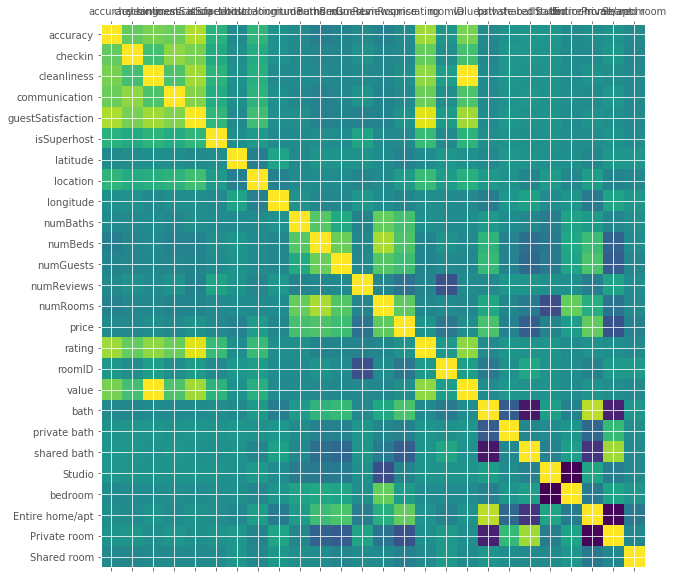

In [365]:
plot_corr(airbnb_Norm)

In [366]:
import seaborn as sns

cols = airbnb_Norm.columns.tolist()
#print(cols)
cols = [cols[14]] + cols[:-14]+cols[15:]
print(cols)
airbnb_Norm = airbnb_Norm[cols]

['price', 'accuracy', 'checkin', 'cleanliness', 'communication', 'guestSatisfaction', 'isSuperhost', 'latitude', 'location', 'longitude', 'numBaths', 'numBeds', 'numGuests', 'rating', 'roomID', 'value', 'bath', 'private bath', 'shared bath', 'Studio', 'bedroom', 'Entire home/apt', 'Private room', 'Shared room']


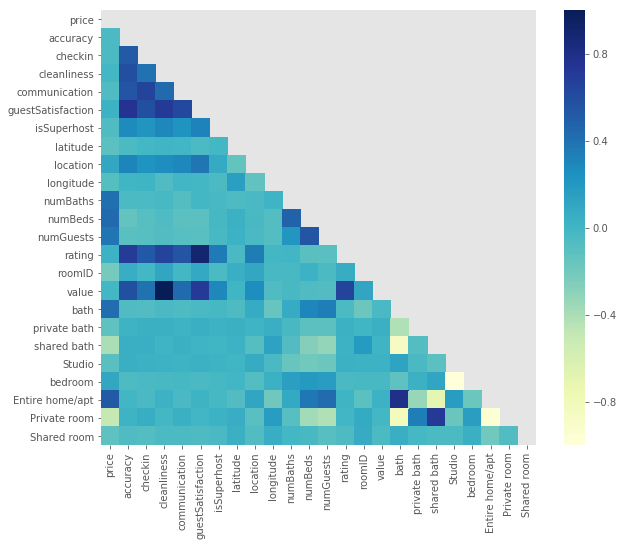

In [367]:
corr = airbnb_Norm.corr()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap="YlGnBu",
           square=True, ax=ax)
plt.show()

# 2.   Machine Learning on Dataset: Linear Regression
Now the data is looking pretty good! We can now proceed to doing some machine learning I do believe!

In [209]:
airbnbNew = airbnbNew.set_index('roomID')

In [210]:
from sklearn import svm, datasets, cross_validation
from sklearn import metrics 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Shuffling the dataframe
airbnbNew = airbnbNew.iloc[np.random.permutation(len(airbnbNew))]

# Finally dropping off roomID with roomID as new index
# airbnbNew.drop(['roomID'], axis=1, inplace=True)

# Removing the price column from the matrix.
airbnb_NormNoY = airbnb_Norm.drop(['price'], axis=1, inplace=False)
airbnb_Matrix = airbnb_NormNoY.as_matrix()
X = airbnb_Matrix
y = airbnbNew['price']

# Split the data into training/testing sets
airbnb_X_train = airbnb_Matrix[:-200]
airbnb_X_test = airbnb_Matrix[-200:]

# Split the targets into training/testing sets
airbnb_y_train = y[:-200]
airbnb_y_test = y[-200:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(airbnb_X_train, airbnb_y_train)

# Make predictions using the testing set
airbnb_y_pred = regr.predict(airbnb_X_test)

print('Variance score: %.2f' % r2_score(airbnb_y_test, airbnb_y_pred))
print("Mean squared error: %.2f"
      % mean_squared_error(airbnb_y_test, airbnb_y_pred))

zippedResult = list(zip(airbnb_y_test, airbnb_y_pred))

i = 0
len1 = len(airbnbNew)
for result in zippedResult:
    print(result)
    print(airbnbNew.index[len1-1-i])
    i += 1
print(len(zippedResult))

Variance score: 0.01
Mean squared error: 18743.80
(225, 205.96868020154113)
21668184
(275, 203.30630307487226)
4987238
(285, 190.16103974428106)
16257710
(166, 202.72958961785838)
21853347
(58, 193.2990565291428)
21900077
(80, 203.53540226971123)
13762046
(175, 203.3030660019635)
15411327
(215, 218.0341971318258)
8309731
(89, 185.1469652010702)
20864858
(80, 181.95516816185722)
11497920
(265, 182.87674570407563)
13495558
(65, 205.97187266264928)
20406017
(50, 196.80758599754995)
3016563
(170, 202.52387336372774)
7489950
(300, 184.1703541163471)
9445593
(252, 197.44834200018516)
20320470
(219, 189.99020568466005)
18962722
(140, 203.8957172487351)
19457325
(180, 215.3917923387046)
21355029
(250, 199.9270300077307)
22419213
(108, 189.01723748759238)
4258491
(65, 193.527931935124)
17515321
(350, 217.27891693294907)
17431995
(250, 199.1118956112213)
11713627
(195, 211.43656375163732)
15659753
(230, 204.6624127789558)
2842992
(103, 192.0821342758744)
17544220
(65, 210.84566446520034)
4720719

# 3.    Machine Learning on Dataset: Random Forest

Because our linear regression is not super accurate, let's go a little deeper. Random forest time.

In [211]:
import numpy
print(numpy.__version__)
import sys
print(sys.path)

1.14.0
['', '/anaconda/lib/python36.zip', '/anaconda/lib/python3.6', '/anaconda/lib/python3.6/lib-dynload', '/anaconda/lib/python3.6/site-packages', '/anaconda/lib/python3.6/site-packages/aeosa', '/anaconda/lib/python3.6/site-packages/IPython/extensions', '/Users/adodd202/.ipython']


In [168]:
import numpy as np
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from sklearn.multioutput import MultiOutputRegressor

max_depth = 20
#regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=max_depth,
#                                                          random_state=0))
#regr_multirf.fit(airbnb_X_train, airbnb_y_train)

regr_rf = RandomForestRegressor(max_depth=max_depth, random_state=50)
regr_rf.fit(airbnb_X_train, airbnb_y_train)

# Predict on new data
#y_multirf = regr_multirf.predict(airbnb_X_test)
airbnb_y_pred_rf = regr_rf.predict(airbnb_X_test)

zippedResult = list(zip(airbnb_y_test, airbnb_y_pred_rf))

i = 0
len1 = len(airbnbNew)
for result in zippedResult:
    print(result)
    print(airbnbNew.index[len1-1-i])
    i += 1

print('Variance score: %.2f' % r2_score(airbnb_y_test, airbnb_y_pred_rf))
print("Mean squared error: %.2f" % mean_squared_error(airbnb_y_test, airbnb_y_pred_rf))

(112, 311.4)
14389886
(300, 262.5)
9988787
(90, 169.1)
21218127
(130, 161.1)
13589415
(180, 101.6888888888889)
1583335
(369, 344.3366666666667)
598612
(425, 380.2)
3323189
(100, 180.85999999999999)
20947308
(123, 171.97307692307692)
2046789
(85, 110.8)
14522334
(350, 290.0)
18022636
(200, 189.3657142857143)
15855813
(171, 167.89375)
14552533
(80, 106.1)
7382564
(100, 143.1)
21266160
(500, 409.1)
20175375
(120, 139.0)
6004567
(450, 241.2)
19422870
(77, 46.8)
2151024
(238, 254.3)
1258651
(80, 106.5)
7457099
(75, 79.4)
12469563
(76, 142.0)
22460217
(340, 259.5285714285714)
3895007
(450, 220.2)
1183620
(99, 123.3)
17533091
(198, 145.05)
19343700
(225, 183.6)
2896760
(134, 169.6818181818182)
14855614
(389, 125.1)
21826406
(275, 324.2)
1655027
(190, 288.3)
3817666
(80, 114.5)
1932459
(200, 177.59285714285716)
20404277
(120, 128.1)
17221468
(41, 68.66666666666667)
17142073
(325, 252.15952380952385)
1958765
(350, 268.9041666666667)
222913
(67, 43.3)
15452878
(400, 377.2)
17043121
(240, 193.843

Somethings are a little fishy here. A lot of the data is off. This is in part due to airbnb's fluxuations in pricing depending on the day. Another aspect that is poorly factored in is the quality of the apartment.

0   -74.002132
1   -73.960403
2   -73.990709
3   -73.945544
4   -74.031846
Name: longitude, dtype: float64


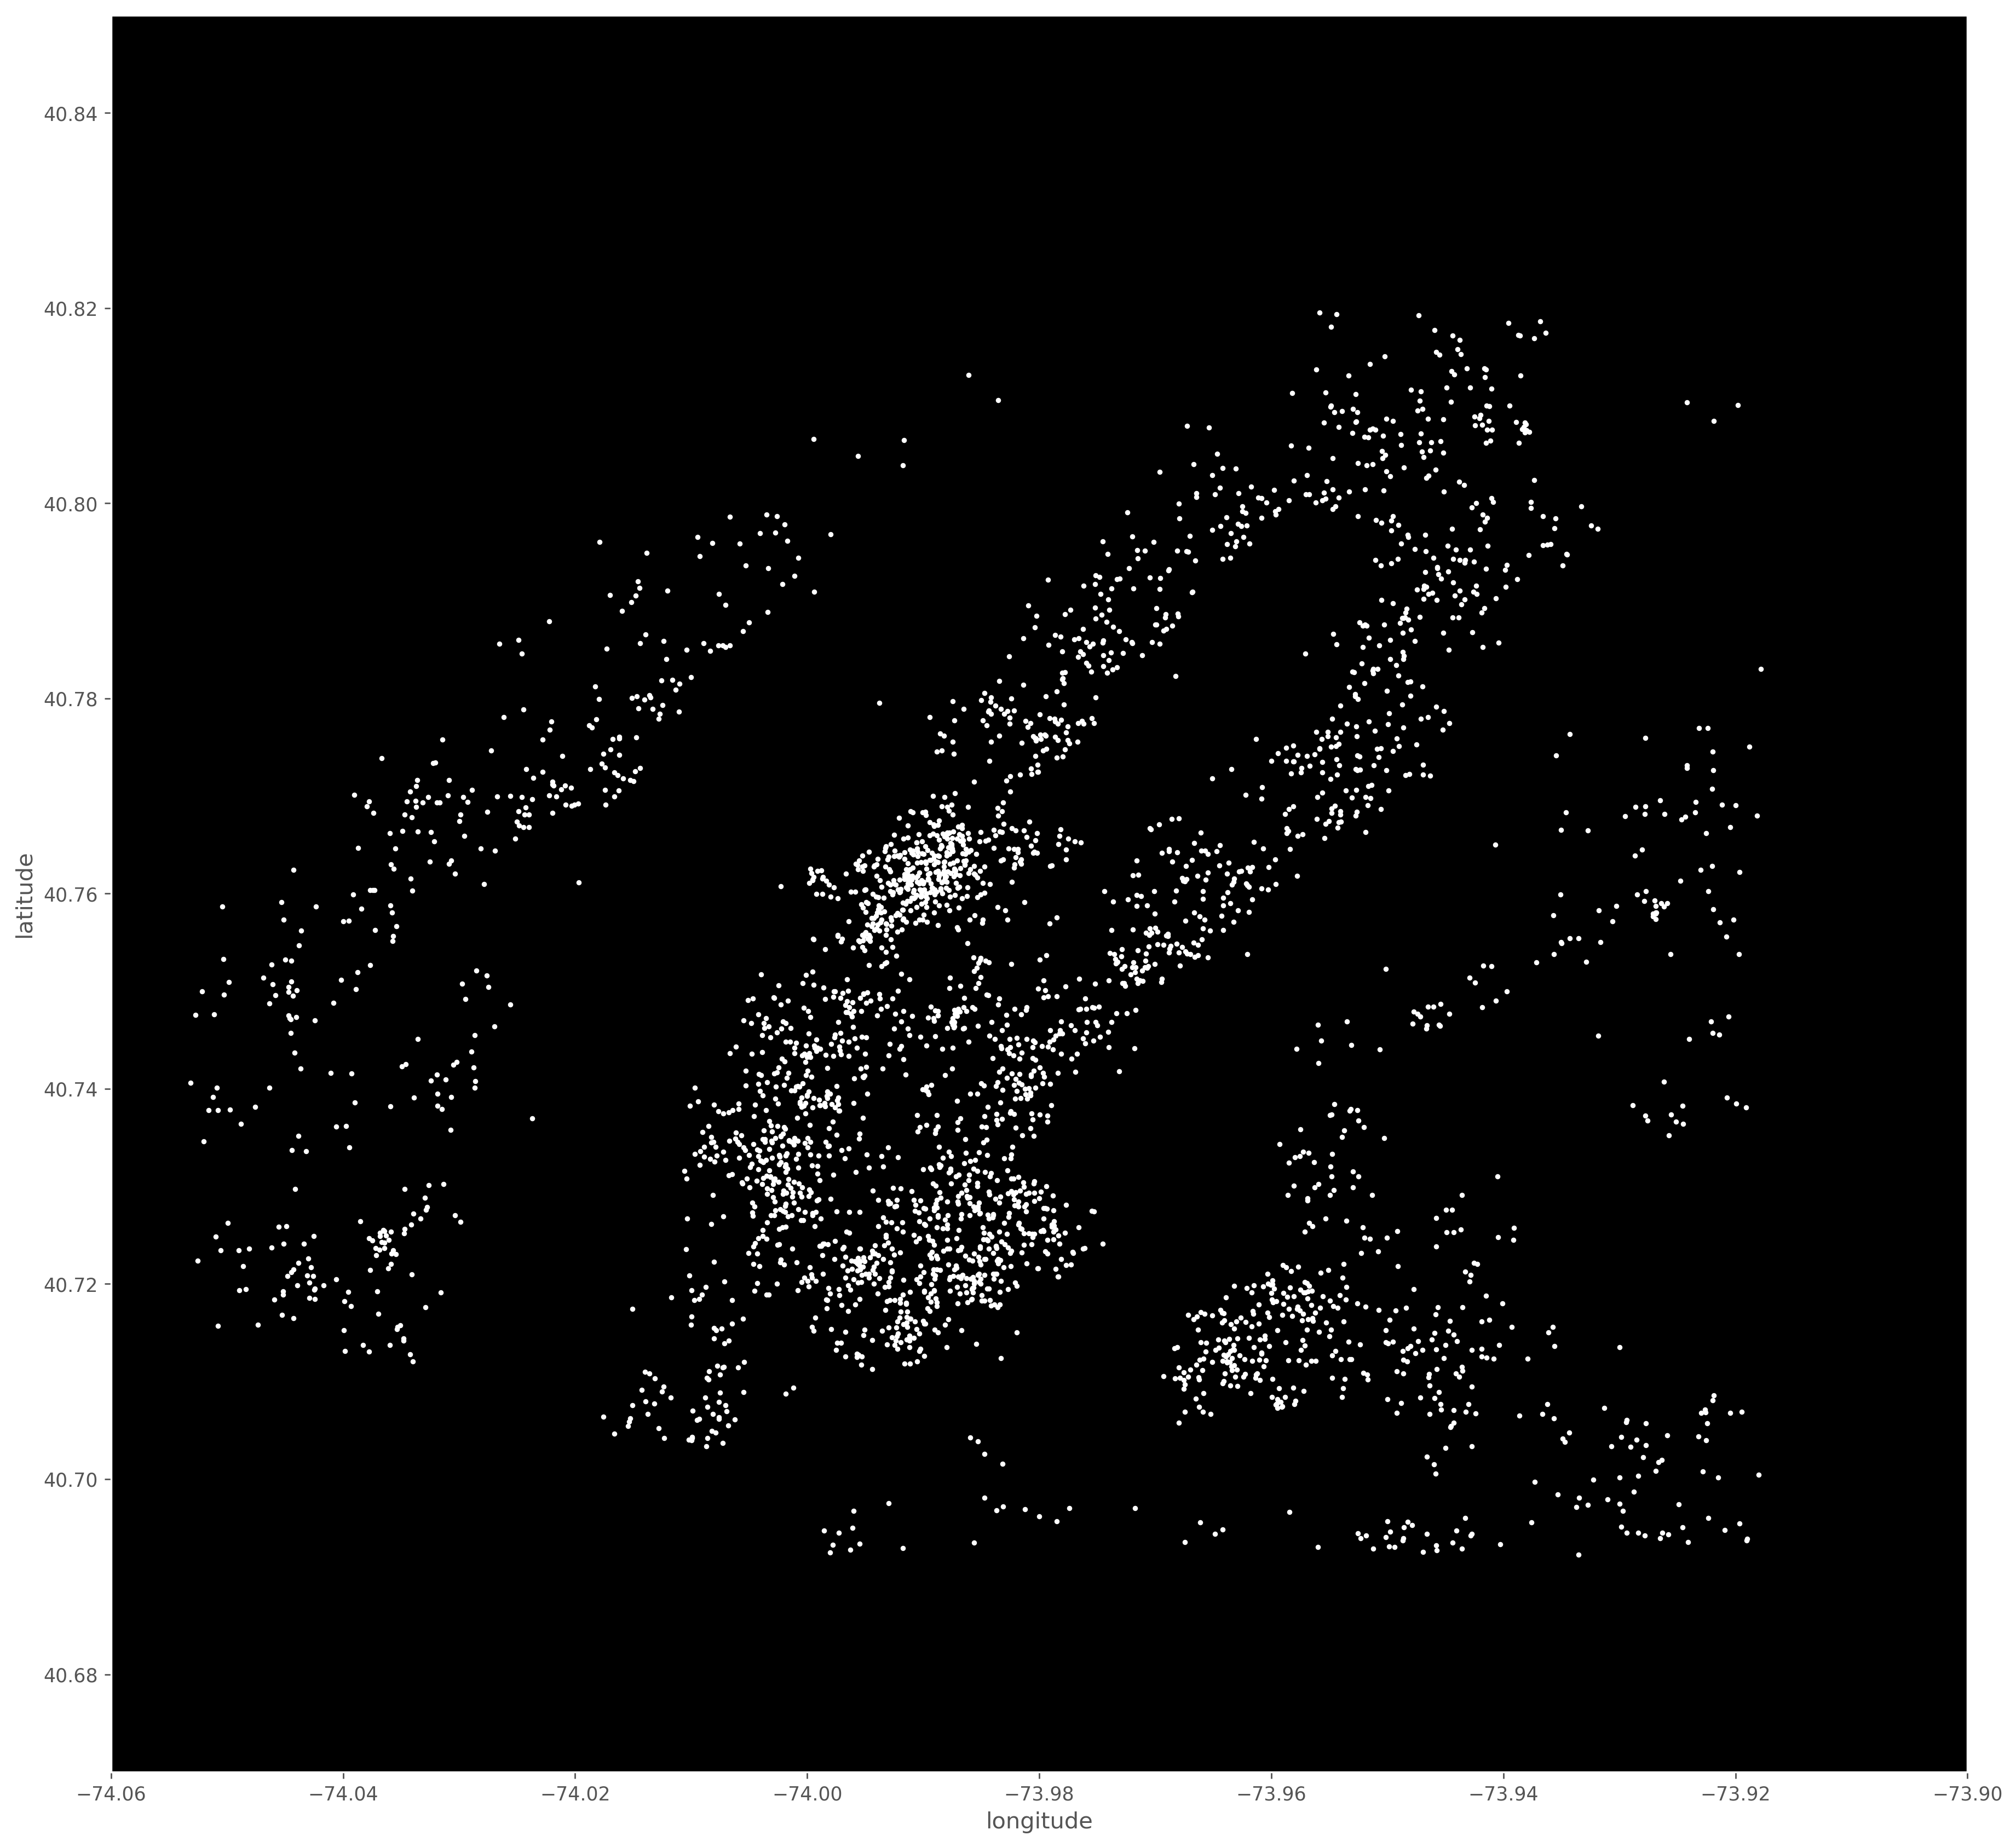

In [183]:
import matplotlib  
import matplotlib.pyplot as plt  
import pandas as pd
#Inline Plotting for Ipython Notebook 
%matplotlib inline 

#pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)  
from matplotlib import rcParams  
rcParams['figure.figsize'] = (17.5, 17) #Size of figure  
rcParams['figure.dpi'] = 250

print(airbnb['longitude'].head(5))

P=airbnbNew.plot(kind='scatter', x='longitude', y='latitude',color='white',
                 xlim=(-74.06,-73.9),ylim=(40.67, 40.85),s=5,alpha=1)
P.set_facecolor('black') #Background Color


The above map shows all the latitudes and longitudes for all of the datapoints I scraped.

The plot is not the prettiest, so let's bring this into Leaflet...

1. Bring datasets into R.  Also need:
    - airbnbNew (full dataset with labels)
    - airbnb (this has all the latitudes and longitudes we can use)
    - airbnb_NormNoY (training X data for the RF training)

In [212]:
airbnbNew.to_csv("airbnbNew_Data.csv")
airbnb.to_csv("airbnb_Data.csv")
airbnb_NormNoY.to_csv("airbnb_NormNoY_Data.csv")
airbnb_Norm.to_csv("airbnb_Norm_Data.csv")